In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('../Data/bank_data_C.csv')
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/01/1994,F,JAMSHEDPUR,17819.05,02/08/2016,143207,25.0
1,T2,C2142763,04/04/1957,M,JHAJJAR,2270.69,02/08/2016,141858,27999.0
2,T3,C4417068,26/11/1996,F,MUMBAI,17874.44,02/08/2016,142712,459.0
3,T4,C5342380,14/09/1973,F,MUMBAI,866503.21,02/08/2016,142714,2060.0
4,T5,C9031234,24/03/1988,F,NAVI MUMBAI,6714.43,02/08/2016,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,08/04/1990,M,NEW DELHI,7635.19,18/09/2016,184824,799.0
1041610,T1048564,C6459278,20/02/1992,M,NASHIK,27311.42,18/09/2016,183734,460.0
1041611,T1048565,C6412354,18/05/1989,M,HYDERABAD,221757.06,18/09/2016,183313,770.0
1041612,T1048566,C6420483,30/08/1978,M,VISAKHAPATNAM,10117.87,18/09/2016,184706,1000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


In [4]:
df.describe(include='all')


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,07/08/2016,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149986e+05,NaN,1.571221e+05,1.566096e+03
std,NaN,NaN,NaN,NaN,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.728140e+03,NaN,1.240410e+05,1.600000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.676852e+04,NaN,1.642470e+05,4.575000e+02
75%,NaN,NaN,NaN,NaN,NaN,5.742885e+04,NaN,2.000220e+05,1.200000e+03


### DATA CLEANING

In [5]:
df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [6]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], format= "%d/%m/%Y")
df['TransactionDate'] =pd.to_datetime(df['TransactionDate'], format= "%d/%m/%Y")


In [7]:
df.describe(include='all')

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,NaN,3,9275,NaN,NaN,NaN,NaN
top,T1,C5533885,NaN,M,MUMBAI,NaN,NaN,NaN,NaN
freq,1,6,NaN,760978,101997,NaN,NaN,NaN,NaN
mean,NaN,NaN,1975-06-19 06:47:20.104683840,NaN,NaN,1.149986e+05,2016-08-25 04:47:02.533492224,1.571221e+05,1.566096e+03
min,NaN,NaN,1800-01-01 00:00:00,NaN,NaN,0.000000e+00,2016-08-01 00:00:00,0.000000e+00,0.000000e+00
25%,NaN,NaN,1980-07-20 00:00:00,NaN,NaN,4.728140e+03,2016-08-12 00:00:00,1.240410e+05,1.600000e+02
50%,NaN,NaN,1987-04-03 00:00:00,NaN,NaN,1.676852e+04,2016-08-25 00:00:00,1.642470e+05,4.575000e+02
75%,NaN,NaN,1991-02-24 00:00:00,NaN,NaN,5.742885e+04,2016-09-06 00:00:00,2.000220e+05,1.200000e+03
max,NaN,NaN,2029-12-19 00:00:00,NaN,NaN,1.150355e+08,2016-10-21 00:00:00,2.359590e+05,1.560035e+06


### EXPLORATORY DATA ANALYSIS (EDA)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041614 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 71.5+ MB


In [9]:
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

### CATEGORICAL FEATURES

In [11]:
df['CustomerID'].nunique()

879358

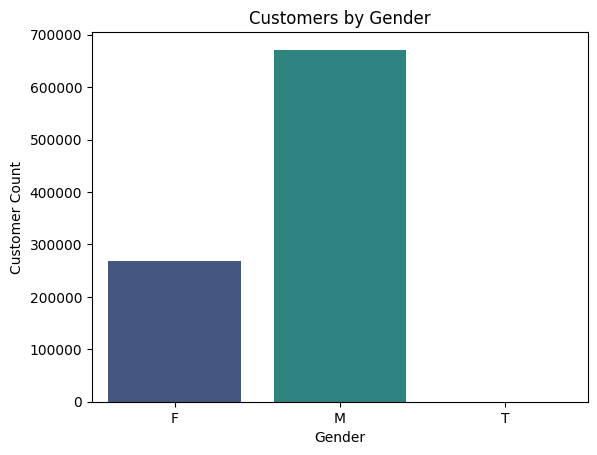

In [12]:
gender_cust= df.groupby('CustGender')['CustomerID'].nunique().reset_index(name='count')
sns.barplot(data = gender_cust, x='CustGender', y='count', hue='CustGender', palette='viridis')
plt.title("Customers by Gender")
plt.xlabel("Gender")
plt.ylabel("Customer Count")
plt.show()


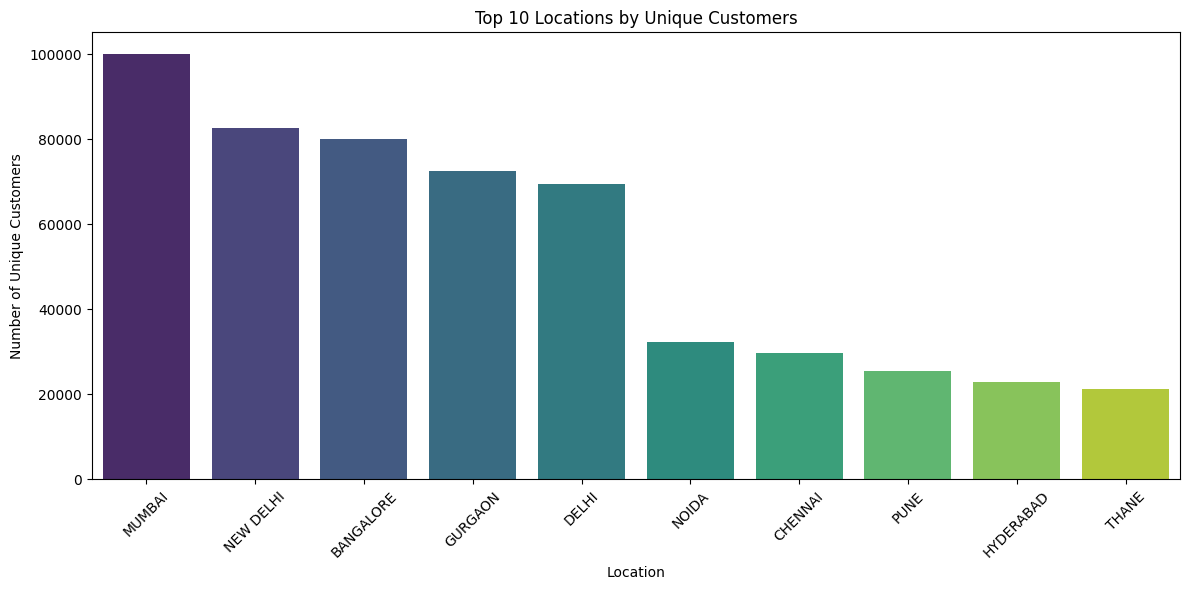

In [13]:

top_locations = df.groupby('CustLocation')['CustomerID'].nunique().sort_values(ascending=False).head(10)

# Reset index to convert to DataFrame
top_locations_df = top_locations.reset_index()
top_locations_df.columns = ['CustLocation', 'UniqueCustomerCount']


# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations_df, x='CustLocation', y='UniqueCustomerCount', hue ='CustLocation', palette='viridis')
plt.title('Top 10 Locations by Unique Customers')
plt.xlabel('Location')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


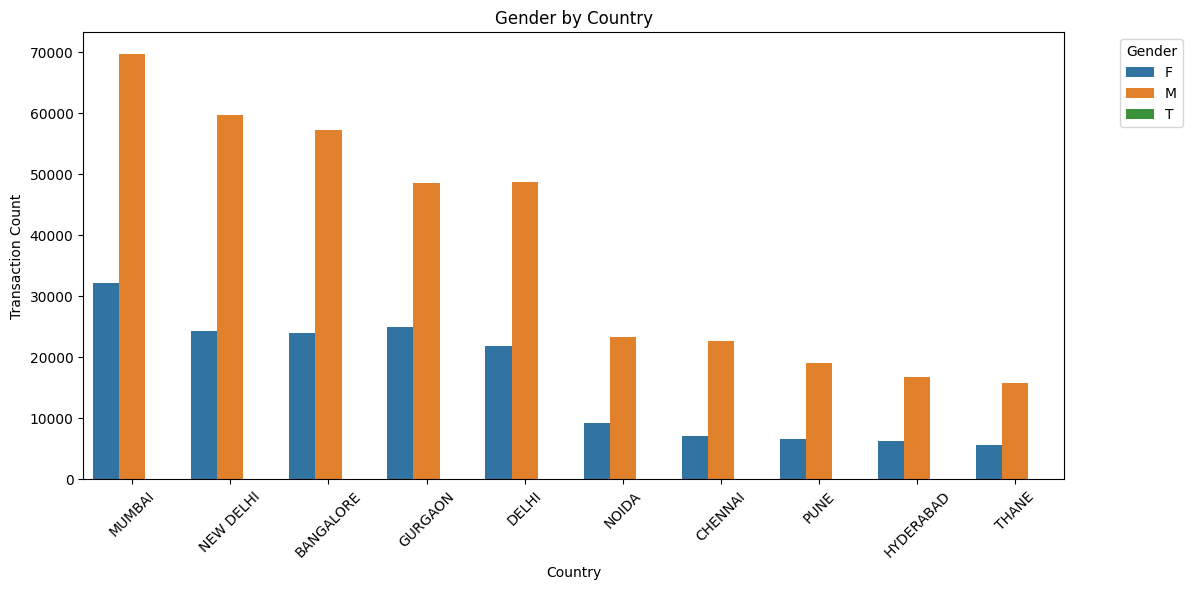

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='CustLocation', hue='CustGender', order=df['CustLocation'].value_counts().head(10).index)
plt.xticks(rotation=45)
plt.title("Gender by Country")
plt.xlabel("Country")
plt.ylabel("Transaction Count")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

NUMERICAL FEATURES

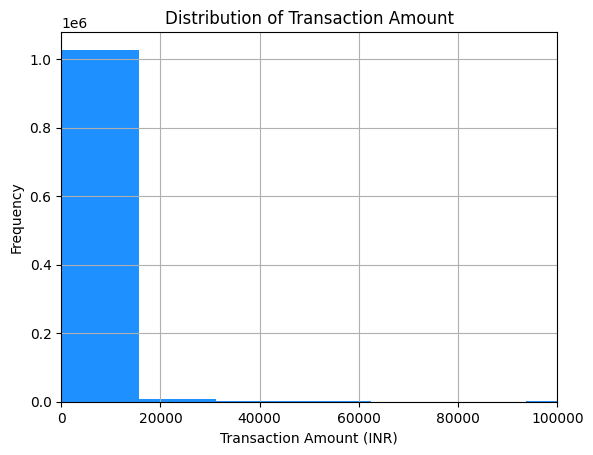

In [29]:
df['TransactionAmount (INR)'].hist(bins=100, color='dodgerblue')
plt.xlim(0, 100000) 
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Axes: >

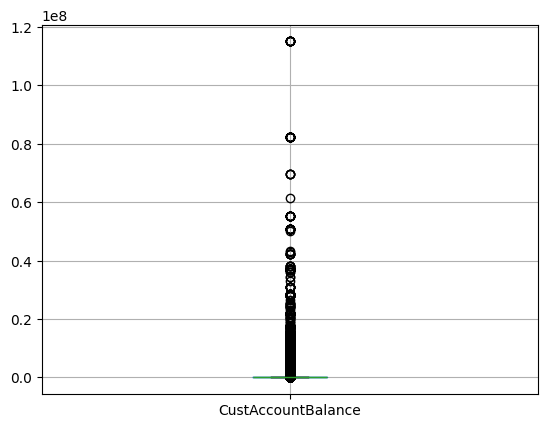

In [16]:
df.boxplot(column='CustAccountBalance')

Transaction Frequency per Month

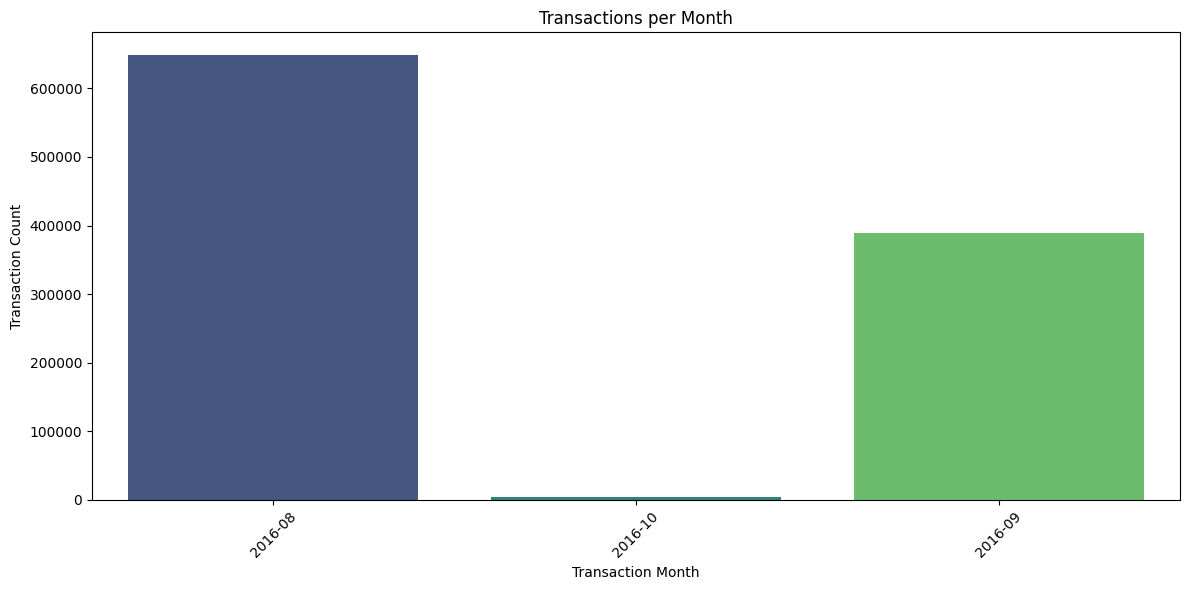

In [ ]:
df['TransactionMonth'] = df['TransactionDate'].dt.to_period('M').astype(str)
# Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='TransactionMonth', hue='TransactionMonth', palette='viridis')
plt.title('Transactions per Month')
plt.xlabel('Transaction Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
print(f"The last transaction date is : {df['TransactionDate'].min()}")
print(f"The lfirsttransaction date is : {df['TransactionDate'].max()}")

The last transaction date is : 2016-08-01 00:00:00
The lfirsttransaction date is : 2016-10-21 00:00:00


In [19]:
df.groupby('CustomerDOB')['CustomerID'].nunique()

CustomerDOB
1800-01-01    55634
1930-01-01        1
1930-01-10        2
1930-02-01        7
1930-02-15       11
              ...  
2029-08-15        2
2029-09-23        2
2029-10-29        3
2029-11-27        1
2029-12-19        1
Name: CustomerID, Length: 17233, dtype: int64

In [20]:
df.describe(include='all')

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionMonth
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06,1041614
unique,1041614,879358,NaN,3,9275,NaN,NaN,NaN,NaN,3
top,T1,C5533885,NaN,M,MUMBAI,NaN,NaN,NaN,NaN,2016-08
freq,1,6,NaN,760978,101997,NaN,NaN,NaN,NaN,649243
mean,NaN,NaN,1975-06-19 06:47:20.104683840,NaN,NaN,1.149986e+05,2016-08-25 04:47:02.533492224,1.571221e+05,1.566096e+03,NaN
min,NaN,NaN,1800-01-01 00:00:00,NaN,NaN,0.000000e+00,2016-08-01 00:00:00,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,1980-07-20 00:00:00,NaN,NaN,4.728140e+03,2016-08-12 00:00:00,1.240410e+05,1.600000e+02,NaN
50%,NaN,NaN,1987-04-03 00:00:00,NaN,NaN,1.676852e+04,2016-08-25 00:00:00,1.642470e+05,4.575000e+02,NaN
75%,NaN,NaN,1991-02-24 00:00:00,NaN,NaN,5.742885e+04,2016-09-06 00:00:00,2.000220e+05,1.200000e+03,NaN
max,NaN,NaN,2029-12-19 00:00:00,NaN,NaN,1.150355e+08,2016-10-21 00:00:00,2.359590e+05,1.560035e+06,NaN


In [21]:
data = df[df['CustomerDOB'] != '1800-01-01 00:00:00'].copy()	
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionMonth
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,2016-08
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,2016-08
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,2016-08
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,2016-08
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,2016-08
...,...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,2016-09
1041610,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,2016-09
1041611,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,2016-09
1041612,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,2016-09


In [22]:
data.describe()

,CustomerDOB,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,985322,9.853220e+05,985322,985322.000000,9.853220e+05
mean,1985-06-27 13:38:17.130887232,1.060612e+05,2016-08-25 04:14:08.956991232,157434.409364,1.452425e+03
min,1930-01-01 00:00:00,0.000000e+00,2016-08-01 00:00:00,0.000000,0.000000e+00
25%,1982-02-13 00:00:00,4.582132e+03,2016-08-12 00:00:00,124242.000000,1.510000e+02
50%,1987-09-14 00:00:00,1.600630e+04,2016-08-25 00:00:00,164625.000000,4.310000e+02
75%,1991-05-12 00:00:00,5.375908e+04,2016-09-06 00:00:00,200151.000000,1.125000e+03
max,2029-12-19 00:00:00,1.150355e+08,2016-10-21 00:00:00,235959.000000,1.560035e+06
std,NaN,8.179054e+05,NaN,51270.673224,6.139765e+03


Fix DOB after  the Transaction date

In [ ]:
from pandas.tseries.offsets import DateOffset
data.loc[data['CustomerDOB'] > data['TransactionDate'], 'CustomerDOB'] -= DateOffset(years=100)

Calculating Age 

In [30]:
data['CustomerAge'] =(data['TransactionDate'] - data['CustomerDOB']).dt.days //365
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionMonth,CustomerAge
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,2016-08,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,2016-08,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,2016-08,19
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,2016-08,42
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,2016-08,28
...,...,...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,2016-09,26
1041610,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,2016-09,24
1041611,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,2016-09,27
1041612,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,2016-09,38


In [31]:
data.describe()

,CustomerDOB,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
count,985322,9.853220e+05,985322,985322.000000,9.853220e+05,985322.000000
mean,1985-06-20 13:29:33.551387264,1.060612e+05,2016-08-25 04:14:08.956991232,157434.409364,1.452425e+03,30.714279
min,1918-05-03 00:00:00,0.000000e+00,2016-08-01 00:00:00,0.000000,0.000000e+00,0.000000
25%,1982-02-10 00:00:00,4.582132e+03,2016-08-12 00:00:00,124242.000000,1.510000e+02,25.000000
50%,1987-09-13 00:00:00,1.600630e+04,2016-08-25 00:00:00,164625.000000,4.310000e+02,28.000000
75%,1991-05-11 00:00:00,5.375908e+04,2016-09-06 00:00:00,200151.000000,1.125000e+03,34.000000
max,2016-02-22 00:00:00,1.150355e+08,2016-10-21 00:00:00,235959.000000,1.560035e+06,98.000000
std,NaN,8.179054e+05,NaN,51270.673224,6.139765e+03,8.769739


Age Distribution

Text(0.5, 1.0, 'Age distribution')

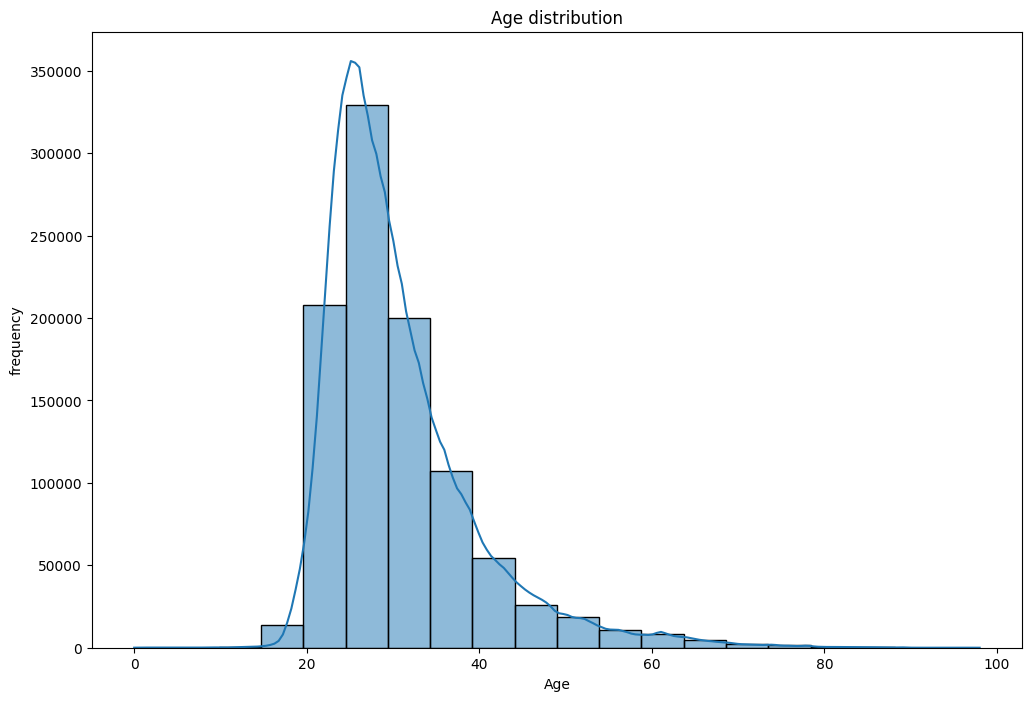

In [34]:
plt.figure(figsize=(12, 8))
sns.histplot(data['CustomerAge'], bins =20, kde=True)
plt.xlabel('Age')
plt.ylabel('frequency')
plt.title('Age distribution')

In [ ]:
cust = data.groupby('CustomerAge')['CustomerID'].nunique().reset_index(name='Count')
cust

,CustomerAge,Count
0,0,6
1,1,23
2,2,19
3,3,18
4,4,28
...,...,...
92,92,3
93,93,9
94,95,22
95,96,9


### Feature Engineering

In [ ]:
avg_txn =data.groupby('CustomerID')['TransactionAmount (INR)'].mean().rename('AvgTransactionAmount')
avg_txn

CustomerID
C1010011    2553.0
C1010012    1499.0
C1010014     727.5
C1010018      30.0
C1010024    5000.0
             ...  
C9099836     691.0
C9099877     222.0
C9099919     126.0
C9099941      50.0
C9099956     855.0
Name: AvgTransactionAmount, Length: 839081, dtype: float64

In [ ]:
numerical = ['CustAccountBalance', 'TransactionTime', 'TransactionAmount (INR)', 'CustomerAge']

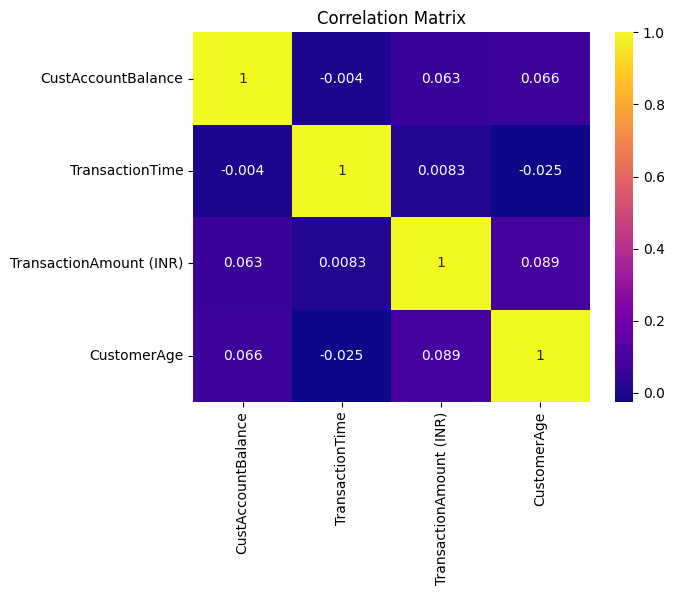

In [ ]:
sns.heatmap(df[numerical].corr(), annot=True, cmap='plasma')
plt.title("Correlation Matrix")
plt.show()

No strong correlations among these variables.